<h1><center>Supervised ML Regression Competition</center></h1>


<img align="center" src="https://compraracciones.com/wp-content/uploads/2021/04/insurance.jpg" style="height:200px" style="width:100px"/>

<hr style="border:2px solid pink"> </hr>

You have been assigned the task of building a model that will predict the insurance cost

You'll find the data in the csv file `insurance`


- target col: "charges"


<hr style="border:2px solid pink"> </hr>


**Guidelines:** 


- train_test_split
    - random state = 42
    - test size = 0.3


- The one who gets the highest r2-score on test data wins


In [146]:
# imports - mathematical and visual
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# SKlearn
# imports - machine learning & model training
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# imports - Pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# imports - Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

## 1. Initial Data Exploration

Let's start by loading our dataset and taking a first look at it.


In [19]:
data = pd.read_csv('insurance.csv')

In [21]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,7725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [25]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## 2. Checking for Missing Values

It's important to know if our data has any missing values. Let's check that next.


In [28]:
# Check for missing values in the DataFrame
missing_values = pd.isnull(data)

# Count missing values in each column
missing_counts = missing_values.sum()

# Count columns with missing values
columns_with_missing = missing_counts[missing_counts > 0].count()

# Check if all columns have missing values
all_columns_missing = missing_counts.all()

# Calculate the total number of missing values
total_missing_values = missing_counts.sum()

# Display the results
print("Missing Values in Each Column:\n", missing_counts)
print("\nNumber of Columns with Missing Values:", columns_with_missing)
print("All Columns Have Missing Values:", all_columns_missing)
print("\nTotal Missing Values in the DataFrame:", total_missing_values)

Missing Values in Each Column:
 age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Number of Columns with Missing Values: 0
All Columns Have Missing Values: False

Total Missing Values in the DataFrame: 0



## 3. Descriptive Statistics

Now, let's move on to some descriptive statistics.

Understanding the distribution of our data is crucial. Let's calculate some descriptive statistics.


In [32]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,15799.570247
std,14.049960,6.098187,1.205493,12559.984021
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,8106.480000
50%,39.000000,30.400000,1.000000,12403.585225
75%,51.000000,34.693750,2.000000,18948.612903
max,64.000000,53.130000,5.000000,64571.074480


## 4. Distribution Analysis

Visualizing the distributions of our features can provide valuable insights. Let's plot the distributions for 'age', 'bmi', and 'charges'.

### Task:
- Plot the histogram for 'age'
- Plot the histogram for 'bmi'
- Plot the histogram for 'charges'


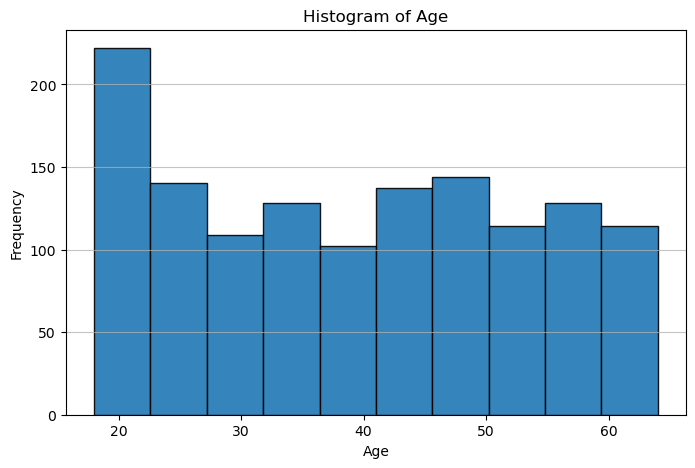

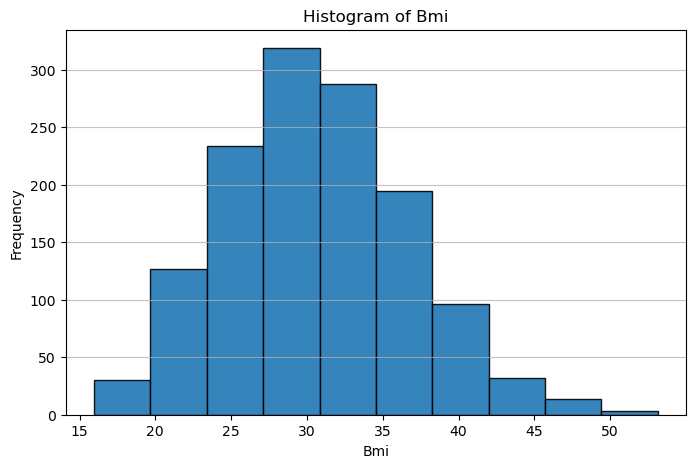

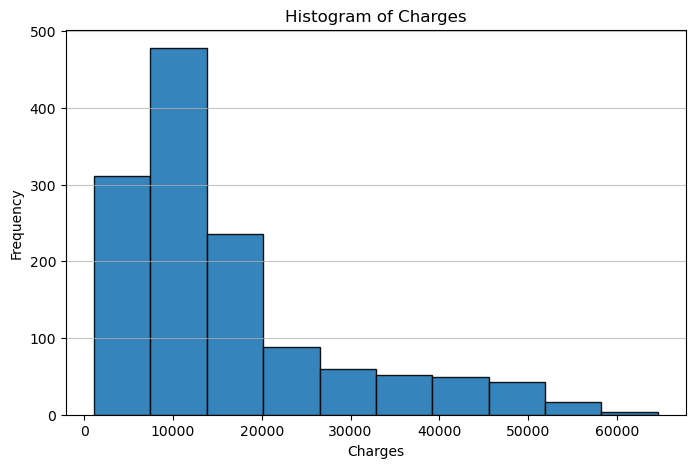

In [36]:
features = ['age', 'bmi', 'charges']

for feature in features:
    plt.figure(figsize=(8, 5))
    plt.hist(data[feature], bins=10, edgecolor='k', alpha=0.9)
    plt.title(f'Histogram of {feature.capitalize()}')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.75)
    plt.show()

## 5. Relationship Between Variables

Let's explore the relationship between some of our features and the target variable 'charges'. We'll create scatter plots to visualize these relationships.

### Task:
- Create a scatter plot for 'age' vs 'charges'
- Create a scatter plot for 'bmi' vs 'charges'
- Create a scatter plot for 'children' vs 'charges'


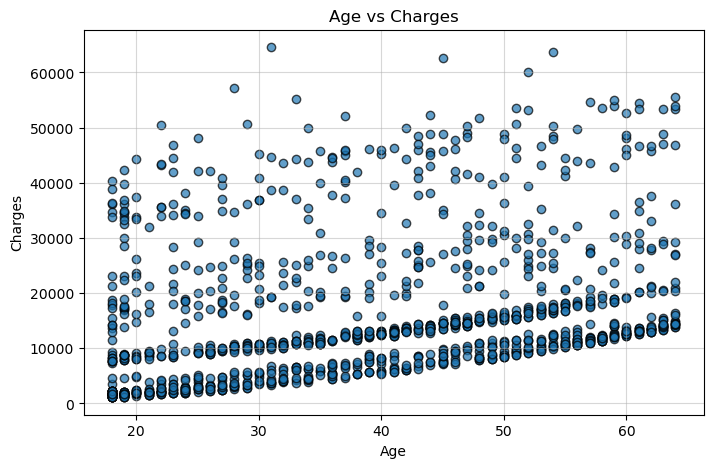

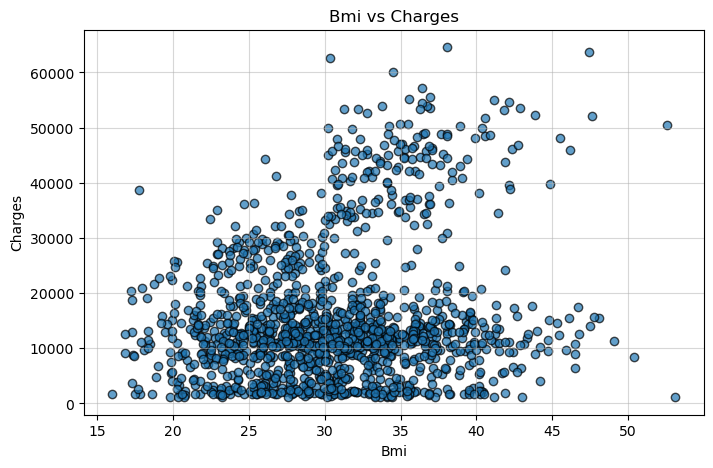

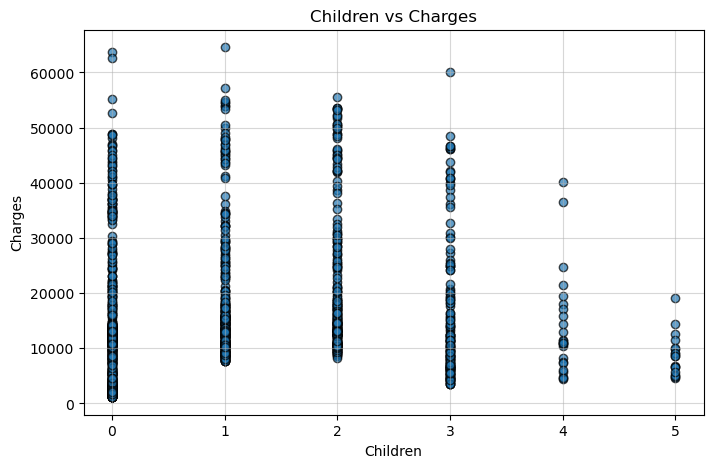

In [39]:
features = ['age', 'bmi', 'children']
target = 'charges'

for feature in features:
    plt.figure(figsize=(8, 5))
    plt.scatter(data[feature], data[target], alpha=0.7, edgecolor='k')
    plt.title(f'{feature.capitalize()} vs {target.capitalize()}')
    plt.xlabel(feature.capitalize())
    plt.ylabel(target.capitalize())
    plt.grid(alpha=0.5)
    plt.show()

## 6. Categorical Analysis

Let's analyze the categorical features 'sex', 'smoker', and 'region' to see how they relate to 'charges'.

### Task:
- Plot the distribution of 'charges' for different 'sex'
- Plot the distribution of 'charges' for different 'smoker'
- Plot the distribution of 'charges' for different 'region'


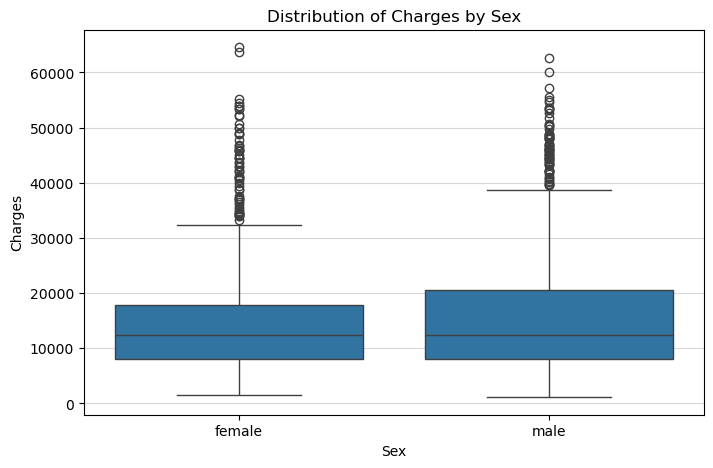

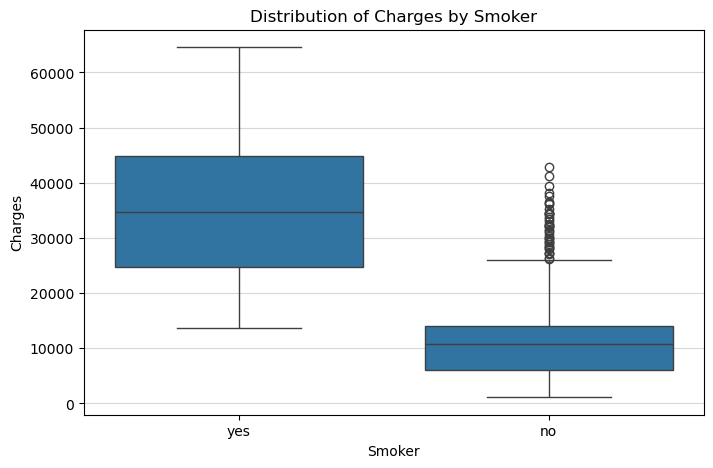

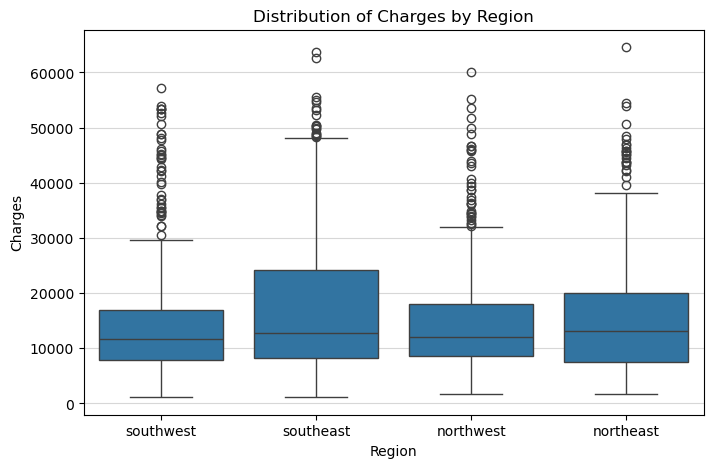

In [47]:
categorical_features = ['sex', 'smoker', 'region']

for feature in categorical_features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=data[feature], y=data['charges'])
    plt.title(f'Distribution of Charges by {feature.capitalize()}')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Charges')
    plt.grid(axis='y', alpha=0.5)
    plt.show()

## 7. Correlation Analysis

To understand how our numerical features relate to each other and to the target variable, let's calculate and visualize the correlation matrix.

### Task:
- Calculate the correlation matrix for the dataset
- Visualize the correlation matrix using a heatmap


In [58]:
data_num_only = data.drop(columns=['sex', 'smoker', 'region'])

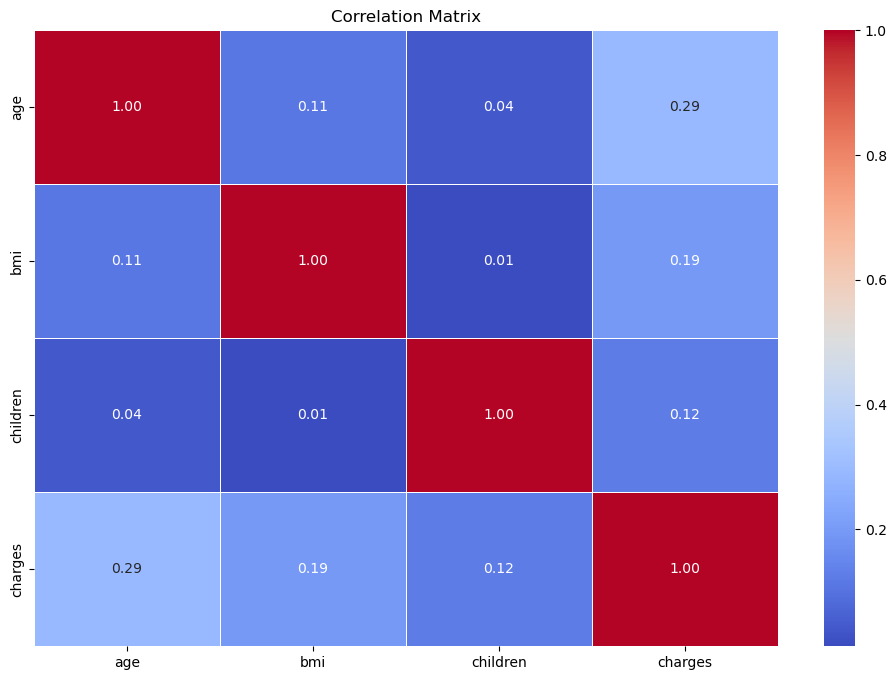

In [60]:
corr_matrix = data_num_only.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Modelling time!

## 1. Find the Naive Baseline

Before we build any models, let's establish a naive baseline. This will help us understand how well our models perform compared to a simple approach. In regression problems, the naive baseline is often the mean of the target variable.

### Task:
- Calculate the mean of the target variable 'charges'
- Explain why it's important to establish a naive baseline


In [64]:
naive_baseline = data['charges'].mean()

In [ ]:
# It's important because it establishes a starting point to evaluate the performance of
# the model.

## 2. Initial Modelling Without GridSearch or Pipeline

Let's build a simple linear regression model without any feature engineering, grid search, or pipeline. This will serve as our initial baseline for comparison.

### Task:
- Split the data into training and test sets
- Train a simple linear regression model
- Evaluate its performance using regression metrics
- Write it down as a markdown below so you can keep track. This is a scientific experiment


Performance Metrics:
- Mean Absolute Error (MAE): 9235.96
- Mean Squared Error (MSE): 139842871.08
- Root Mean Squared Error (RMSE): 11825.52
- R-squared (R2): 0.15

At the current state, this model is unusable.

In [74]:
# Define the features (X) and target (y)
X = data.drop(columns=['charges', 'sex', 'smoker', 'region'])  
y = data['charges']  # Target (the 'Type' column)

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the splits
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (1070, 3)
X_test shape: (268, 3)
y_train shape: (1070,)
y_test shape: (268,)


In [78]:
# Training
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [80]:
# Performance
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate regression metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

# Print the metrics
print("Performance Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Performance Metrics:
Mean Absolute Error (MAE): 9235.96
Mean Squared Error (MSE): 139842871.08
Root Mean Squared Error (RMSE): 11825.52
R-squared (R2): 0.15


## 3. Feature Engineering

Now, let's brainstorm and create some new features to see if we can improve the model's performance.

### Questions:
1. Should we create an interaction feature between 'bmi' and 'children'? 
2. Should we create age groups to see if the model improves by categorizing age?
3. Should we create a high-risk indicator based on 'smoker' and 'bmi'?

- Remember nothing is set in stone, this is your experiment, your hypothesis. You may not need to, but its important to explore these questions

### Task:
- Create new features based on the questions above
- Explain the rationale behind each feature



## Feature #1: Interaction Between BMI and Children

Rationale: A higher BMI and multiple children might increase costs because of health issues.

In [92]:
# Adding the new feature
data['bmi_children_interaction'] = data['bmi'] * data['children']

data.head()

,age,sex,bmi,children,smoker,region,charges,bmi_children_interaction
0,19,female,27.900,0,yes,southwest,16884.92400,0.00
1,18,male,33.770,1,no,southeast,7725.55230,33.77
2,28,male,33.000,3,no,southeast,4449.46200,99.00
3,33,male,22.705,0,no,northwest,21984.47061,0.00
4,32,male,28.880,0,no,northwest,3866.85520,0.00


## Feature #2: Age groups for categorization

Rationale: Different age ranges might have different healt requirements which could result in vastly different charges.

In [98]:
bins = [0, 20, 40, 60, 100]
labels = ['0-20', '21-40', '41-60', '61+']
data['age_group'] = pd.cut(data['age'], bins=bins, labels=labels)

In [100]:
data.head()

,age,sex,bmi,children,smoker,region,charges,bmi_children_interaction,age_group
0,19,female,27.900,0,yes,southwest,16884.92400,0.00,0-20
1,18,male,33.770,1,no,southeast,7725.55230,33.77,0-20
2,28,male,33.000,3,no,southeast,4449.46200,99.00,21-40
3,33,male,22.705,0,no,northwest,21984.47061,0.00,21-40
4,32,male,28.880,0,no,northwest,3866.85520,0.00,21-40


## Feature #3: High risk indicator based on smoker and BMI

Rationale: People that both smoke and have high BMI might result in health issues that can drive the charges.

In [105]:
data['high_risk'] = ((data['smoker'] == 'yes') & (data['bmi'] > 30)).astype(int)

In [107]:
data.head()

,age,sex,bmi,children,smoker,region,charges,bmi_children_interaction,age_group,high_risk
0,19,female,27.900,0,yes,southwest,16884.92400,0.00,0-20,0
1,18,male,33.770,1,no,southeast,7725.55230,33.77,0-20,0
2,28,male,33.000,3,no,southeast,4449.46200,99.00,21-40,0
3,33,male,22.705,0,no,northwest,21984.47061,0.00,21-40,0
4,32,male,28.880,0,no,northwest,3866.85520,0.00,21-40,0


## 4. Modelling with Feature Engineering

Now that we have new features, let's see if they improve our model's performance.
Did it improve the performance? Yes? No? Why

### Task:
- Split the data into training and test sets
- Train a linear regression model with the new features
- Evaluate its performance using regression metrics


In [113]:
# One-hot encoding 
data_encoded = pd.get_dummies(data, columns=['age_group', 'smoker'], drop_first=True)

# Select features (X) and target variable (y)
X = data_encoded[['age', 'bmi', 'children', 'bmi_children_interaction', 'high_risk', 'age_group_21-40', 'age_group_41-60', 'age_group_61+']]
y = data_encoded['charges']

# Split data into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [115]:
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [117]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate regression metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

# Print the metrics
print("Performance Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Performance Metrics:
Mean Absolute Error (MAE): 4682.79
Mean Squared Error (MSE): 42462454.32
Root Mean Squared Error (RMSE): 6516.32
R-squared (R2): 0.74


## Results from Feature Engineering
### Previous:
Performance Metrics:
- Mean Absolute Error (MAE): 9235.96
- Mean Squared Error (MSE): 139842871.08
- Root Mean Squared Error (RMSE): 11825.52
- R-squared (R2): 0.15

### With Feature Enginering:
Performance Metrics:
- Mean Absolute Error (MAE): 4682.79
- Mean Squared Error (MSE): 42462454.32
- Root Mean Squared Error (RMSE): 6516.32
- R-squared (R2): 0.74

## 5. Modelling with Pipeline and Grid Search

Now, let's see how using pipelines can simplify our workflow and prevent data leakage. We'll also use GridSearchCV to find the best hyperparameters.

### Task:
- Create a pipeline that includes scaling and linear regression
- Define a parameter grid for hyperparameter tuning
- Use GridSearchCV to find the best parameters and evaluate the model performance


In [124]:
# Create the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),      # Scaling step
    ('regressor', LinearRegression())  # Linear regression model
])

In [136]:
# Define a parameter grid
param_grid = {
    'regressor': [LinearRegression(), Ridge(), Lasso()],
}

In [138]:
# Create the GridSearchCV object with the pipeline and parameter grid
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_absolute_error')

# Fit GridSearchCV to the data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('regressor', LinearRegression())]),
             param_grid={'regressor': [LinearRegression(), Ridge(), Lasso()]},
             scoring='neg_mean_absolute_error')

In [140]:
# Evaluation

# Best model and parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Calculate regression metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

# Print the results
print(f"Best Model Parameters: {best_params}")
print("Performance Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Best Model Parameters: {'regressor': Lasso()}
Performance Metrics:
Mean Absolute Error (MAE): 4682.42
Mean Squared Error (MSE): 42461398.19
Root Mean Squared Error (RMSE): 6516.24
R-squared (R2): 0.74


## 6. Trying Another Model with Pipeline

Let's try using a Gradient Boosting Regressor to see if it performs better.

### Task:
- Create and use a pipeline for Gradient Boosting Regressor
- Define a parameter grid for grid search
- Use GridSearchCV to find the best parameters and evaluate the model


In [144]:
# Create the pipeline: scaling + gradient boosting regressor
pipeline = Pipeline([
    ('scaler', StandardScaler()),               # Scaling step
    ('regressor', GradientBoostingRegressor())  # Gradient Boosting Regressor
])

# Define a parameter grid for Gradient Boosting
param_grid = {
    'regressor__n_estimators': [100, 200],         # Number of trees
    'regressor__learning_rate': [0.05, 0.1, 0.2],  # Step size for each boosting stage
    'regressor__max_depth': [3, 5, 7],             # Max depth of each tree
    'regressor__min_samples_split': [2, 5, 10],    # Min samples required to split a node
}

# Create the GridSearchCV object with the pipeline and parameter grid
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_absolute_error')

# Fit GridSearchCV to the data
grid_search.fit(X_train, y_train)

# Best model and parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Calculate regression metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

# Print the results
print(f"Best Model Parameters: {best_params}")
print("Performance Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Best Model Parameters: {'regressor__learning_rate': 0.05, 'regressor__max_depth': 3, 'regressor__min_samples_split': 10, 'regressor__n_estimators': 200}
Performance Metrics:
Mean Absolute Error (MAE): 3949.27
Mean Squared Error (MSE): 31057788.70
Root Mean Squared Error (RMSE): 5572.95
R-squared (R2): 0.81


## 7. GridSearch with Several Models

Finally, let's compare several models using GridSearchCV to find the best one.

### Task:
- Define multiple models and their parameter grids
- Use GridSearchCV to find the best model and parameters


In [148]:
# Define models and their parameter grids
models = [
    ('Linear Regression', LinearRegression(), {}),
    ('Ridge', Ridge(), {'regressor__alpha': [0.1, 1, 10]}),
    ('Lasso', Lasso(), {'regressor__alpha': [0.1, 1, 10]}),
    ('Gradient Boosting', GradientBoostingRegressor(), {
        'regressor__n_estimators': [100, 200],
        'regressor__learning_rate': [0.05, 0.1, 0.2],
        'regressor__max_depth': [3, 5],
        'regressor__min_samples_split': [2, 5, 10]
    }),
    ('Random Forest', RandomForestRegressor(), {
        'regressor__n_estimators': [100, 200],
        'regressor__max_depth': [5, 10, 15],
        'regressor__min_samples_split': [2, 5, 10]
    })
]

# Initialize the best model variables
best_model = None
best_score = float('-inf')
best_params = None

# Iterate over the models and perform GridSearchCV
for name, model, param_grid in models:
    print(f"Training {name}...")

    # Create pipeline for each model
    pipeline = Pipeline([
        ('scaler', StandardScaler()),  # Scaling step
        ('regressor', model)  # Model
    ])
    
    # Perform GridSearchCV
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_absolute_error')
    grid_search.fit(X_train, y_train)

    # Get the best model and parameters
    if grid_search.best_score_ > best_score:
        best_score = grid_search.best_score_
        best_model = grid_search.best_estimator_
        best_params = grid_search.best_params_

# Make predictions using the best model
y_pred = best_model.predict(X_test)

# Calculate performance metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

# Print the results
print(f"\nBest Model: {best_model}")
print(f"Best Model Parameters: {best_params}")
print("Performance Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Training Linear Regression...
Training Ridge...
Training Lasso...
Training Gradient Boosting...
Training Random Forest...

Best Model: Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor',
                 GradientBoostingRegressor(learning_rate=0.05,
                                           min_samples_split=10,
                                           n_estimators=200))])
Best Model Parameters: {'regressor__learning_rate': 0.05, 'regressor__max_depth': 3, 'regressor__min_samples_split': 10, 'regressor__n_estimators': 200}
Performance Metrics:
Mean Absolute Error (MAE): 3950.08
Mean Squared Error (MSE): 31090808.72
Root Mean Squared Error (RMSE): 5575.91
R-squared (R2): 0.81


# Machine Learning: Master Challenge

## 8. Calculating Potential Cost or Loss

### Challenge:
Now that you've built and optimized your models, it's time for the final challenge! Your task is to minimize the Root Mean Squared Error (RMSE) of your model's predictions and calculate the potential financial impact of your model's errors.

### Task:
1. Calculate the RMSE of your final model's predictions.
2. Break down the errors into underestimation and overestimation.
3. Calculate the total potential cost or loss to the company.
4. Compete with your classmates to see who can achieve the lowest RMSE and financial impact!

### Explanation:
The RMSE provides an estimate of the average error in your model's predictions. We will also analyze the errors by categorizing them into underestimations and overestimations to understand their financial impact.

#### Steps to Calculate Underestimation and Overestimation Errors:

1. **Calculate RMSE**:
   - Use the `mean_squared_error` function from `sklearn.metrics` and pass your actual values (`y_test`) and predicted values (`y_pred_final`) to it.
   - Take the square root of the result to get the RMSE.
   
2. **Calculate Underestimation Error**:
   - Identify the instances where the actual charges (`y_test`) are greater than the predicted charges (`y_pred_final`).
   - For these instances, calculate the difference between the actual and predicted charges.
   - Sum these differences to get the total underestimation error.

3. **Calculate Overestimation Error**:
   - Identify the instances where the actual charges (`y_test`) are less than the predicted charges (`y_pred_final`).
   - For these instances, calculate the difference between the predicted and actual charges.
   - Sum these differences to get the total overestimation error.

4. **Calculate Total Potential Cost or Loss**:
   - Add the total underestimation error and the total overestimation error to get the total potential cost or loss.

### Let's see who can build the best model!

#### Detailed Instructions:

1. **Calculate RMSE**:
   - Use `mean_squared_error` with `y_test` and `y_pred_final`.
   - Use `np.sqrt` to take the square root of the result.

2. **Calculate Underestimation Error**:
   - Use a boolean condition to filter `y_test` values that are greater than `y_pred_final`.
   - Subtract the predicted values from the actual values for these instances.
   - Sum these differences.

3. **Calculate Overestimation Error**:
   - Use a boolean condition to filter `y_test` values that are less than `y_pred_final`.
   - Subtract the actual values from the predicted values for these instances.
   - Sum these differences.

4. **Calculate Total Potential Cost or Loss**:
   - Add the results of the underestimation error and overestimation error to get the total potential cost or loss.

### Example Walkthrough:

1. **Calculate RMSE**:
   - `rmse = np.sqrt(mean_squared_error(y_test, y_pred_final))`
   - This gives you the average prediction error in dollars.

2. **Calculate Underestimation Error**:
   - `underestimation_error = np.sum(y_test[y_test > y_pred_final] - y_pred_final[y_test > y_pred_final])`
   - This gives you the total amount by which the model undercharged.

3. **Calculate Overestimation Error**:
   - `overestimation_error = np.sum(y_pred_final[y_test < y_pred_final] - y_test[y_test < y_pred_final])`
   - This gives you the total amount by which the model overcharged.

4. **Calculate Total Potential Cost or Loss**:
   - `total_potential_loss = underestimation_error + overestimation_error`
   - This gives you the total financial impact of the model's errors.

### Leaderboard:
Post your RMSE score and total potential cost or loss on the class leaderboard. The student with the lowest RMSE and total potential cost or loss wins bragging rights

### Post Your Results 

- Name: Dylan
- Model Type: Gradient Boosting Regressor
- RMSE: 5,575.91
- Underestimation Error: 506,807.21
- Overestimation Error: 551,813.45
- Total Potential Cost/Loss: 1,058,620.66

In [150]:
import numpy as np
from sklearn.metrics import mean_squared_error

# Predictions from the final model
y_pred_final = best_model.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred_final))
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Calculate Underestimation Error
underestimation_error = np.sum(y_test[y_test > y_pred_final] - y_pred_final[y_test > y_pred_final])
print(f"Underestimation Error: ${underestimation_error:.2f}")

# Calculate Overestimation Error
overestimation_error = np.sum(y_pred_final[y_test < y_pred_final] - y_test[y_test < y_pred_final])
print(f"Overestimation Error: ${overestimation_error:.2f}")

# Calculate Total Potential Cost or Loss
total_potential_loss = underestimation_error + overestimation_error
print(f"Total Potential Cost or Loss: ${total_potential_loss:.2f}")

Root Mean Squared Error (RMSE): 5575.91
Underestimation Error: $506807.21
Overestimation Error: $551813.45
Total Potential Cost or Loss: $1058620.66


## Conclusion

Congratulations! You've completed the lab. Here's a summary of what we've covered:
1. Established a naive baseline using the mean of the target variable.
2. Built an initial linear regression model without any feature engineering or optimization.
3. Performed feature engineering to create new, potentially useful features.
4. Used pipelines and GridSearchCV to optimize the model.
5. Evaluated the final model's performance using RMSE to understand its business impact.

By following these steps, you now have a robust understanding of how to approach a regression problem, from initial exploration to model optimization and business impact assessment. Great job!
